# Raster Analysis with Rasterio

In this notebook, I will use `rasterio` to open a raster file, explore its metadata, and visualize it.
You can find the example raster file that I am using in the Github repository 'A3'

General documentation [here](https://rasterio.readthedocs.io/en/latest/).
Documentation on ploting function of rasterio used in the notebook [here](https://rasterio.readthedocs.io/en/stable/topics/plotting.html)

In [8]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

In [17]:
# Open a raster file
raster_path = 'D:/Downloads/0_2020_08_21.tif'
dataset = rasterio.open(raster_path)

# Displaying raster metadata
print("Raster dataset profile:")
print(dataset.profile)

Raster dataset profile:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1084, 'height': 1474, 'count': 10, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.0, 0.0, 340220.0,
       0.0, -10.0, 5318310.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


In [18]:
# Attempt to get band names from the raster file metadata
band_names = dataset.descriptions

if any(band_names):
    print("Band names:")
    print(band_names)
else:
    print("No named bands found. Listing bands by index:")
    print([f'Band {i+1}' for i in range(dataset.count)])

Band names:
('B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8A', 'B8', 'B11', 'B12')


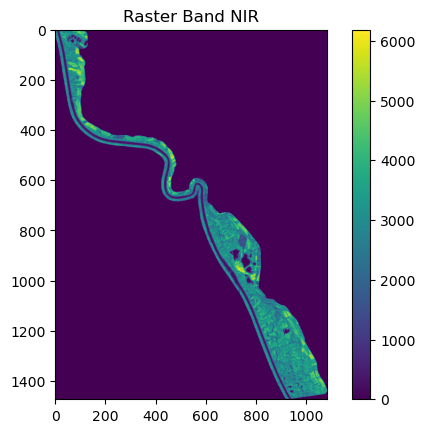

Statistics of Band 1:
Mean: 328.2524076614579
Max: 6187
Min: 0


In [23]:
# Open the raster file
with rasterio.open(raster_path) as dataset:
    # Read the first band
    band1 = dataset.read(7)

# Plotting
plt.imshow(band1, cmap='viridis')  # 'pink' colormap for visualization
plt.colorbar()  # Optionally add a colorbar
plt.title('Raster Band NIR')
# plt.xlabel('Column #')
# plt.ylabel('Row #')
plt.show()

# Optionally, show statistics or process data here
import numpy as np
print("Statistics of Band 1:")
print(f"Mean: {np.mean(band1)}")
print(f"Max: {np.max(band1)}")
print(f"Min: {np.min(band1)}")

In [24]:
# Close the dataset to free resources
dataset.close()